In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("2010.csv")
data.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,3,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88


In [6]:
data.isna().value_counts()

Number  title  artist  top genre  year   bpm    nrgy   dnce   dB     live   val    dur    acous  spch   pop  
False   False  False   False      False  False  False  False  False  False  False  False  False  False  False    100
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     100 non-null    int64 
 1   title      100 non-null    object
 2   artist     100 non-null    object
 3   top genre  100 non-null    object
 4   year       100 non-null    int64 
 5   bpm        100 non-null    int64 
 6   nrgy       100 non-null    int64 
 7   dnce       100 non-null    int64 
 8   dB         100 non-null    int64 
 9   live       100 non-null    int64 
 10  val        100 non-null    int64 
 11  dur        100 non-null    int64 
 12  acous      100 non-null    int64 
 13  spch       100 non-null    int64 
 14  pop        100 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 11.8+ KB


In [22]:
x = data.drop("pop",axis=1)
y = data["pop"]
x.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33
2,3,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7


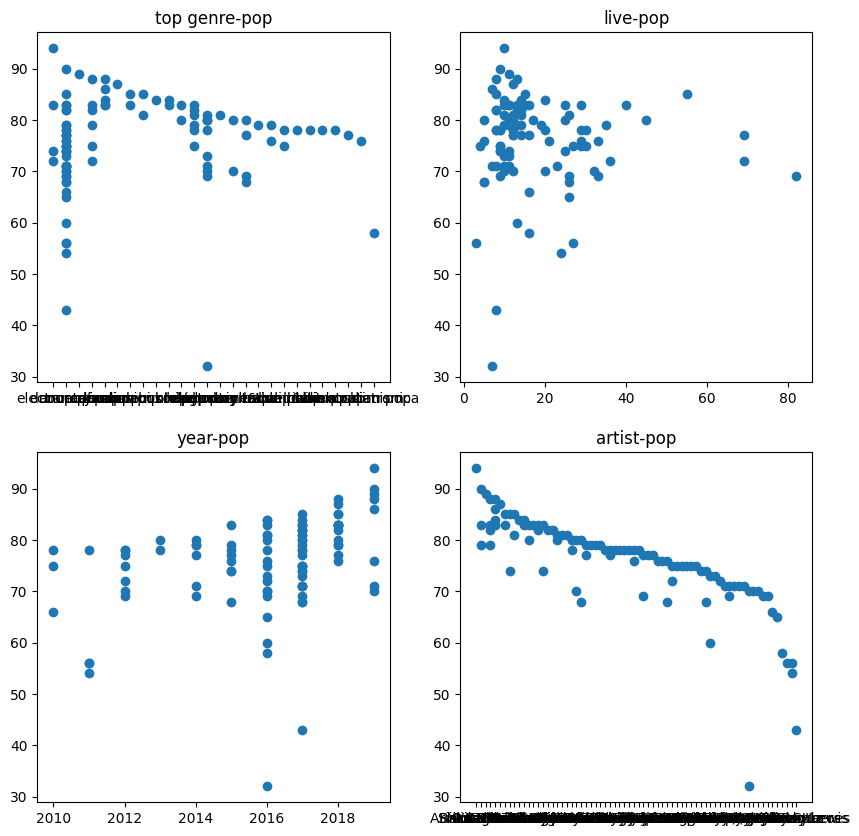

In [15]:
fig = plt.figure(figsize=(10,10))

first = fig.add_subplot(2,2,1)
first.scatter(x["top genre"],y)
first.set_title("top genre-pop")

second = fig.add_subplot(2,2,2)
second.scatter(x["live"],y)
second.set_title("live-pop")

third = fig.add_subplot(2,2,3)
third.scatter(x["year"],y)
third.set_title("year-pop")

foruth = fig.add_subplot(2,2,4)
foruth.scatter(x["artist"],y)
foruth.set_title("artist-pop")

fig.show()

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=101)
x_train1 = x_train[["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch"]]
x_test1 = x_test[["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch"]]

In [51]:
model = LinearRegression()

model.fit(x_train1,y_train)
predicted = model.predict(x_test1)

from sklearn import metrics

print("LINEAR REGRESSION MODEL")
print("Mean: ",y_test.mean())
print("MEA: ",metrics.mean_absolute_error(y_test,predicted))
print("MSE: ", metrics.mean_squared_error(y_test,predicted))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print("RMSE as percent: %",round(np.sqrt(metrics.mean_squared_error(y_test,predicted))*100/y_test.mean()))



LINEAR REGRESSION MODEL
Mean:  76.25714285714285
MEA:  7.959736817754122
MSE:  106.70813830109896
RMSE:  10.329963131642772
RMSE as percent: % 14


In [63]:
from sklearn.neighbors import KNeighborsRegressor

model1 = KNeighborsRegressor(n_neighbors=7) #after n=7, error percent %13 continues for a bit then periodically decreases. so it's okay to choose n as 6 or 7. 

model1.fit(x_train1,y_train)
predicted_knn = model1.predict(x_test1)

print("K-NEAREST NEIGHBOR MODEL")
print("Mean: ",y_test.mean())
print("MEA: ",metrics.mean_absolute_error(y_test,predicted_knn))
print("MSE: ", metrics.mean_squared_error(y_test,predicted_knn))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predicted_knn)))
print("RMSE as percent: %",round(np.sqrt(metrics.mean_squared_error(y_test,predicted_knn))*100/y_test.mean()))


K-NEAREST NEIGHBOR MODEL
Mean:  76.25714285714285
MEA:  8.259183673469389
MSE:  103.03935860058309
RMSE:  10.150830438963261
RMSE as percent: % 13


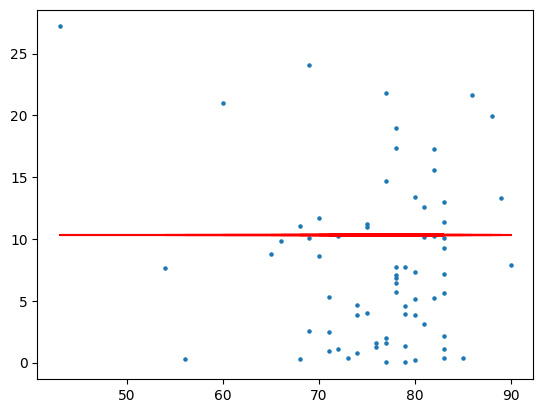

In [73]:
rmse = [np.sqrt(metrics.mean_squared_error(y_test,predicted))]*70

error=np.sqrt((y_test-predicted)**2)

plt.scatter(y_test,error,s=5)
plt.plot(y_test,rmse,color="red") 
plt.show()